In [1]:
import numpy as np
import scipy as scp
from scipy import special
import matplotlib.pyplot as plt
import time
%matplotlib inline 

In [39]:
class NeuralNetwork:
    
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        
        # layers
        self.inNodes = inputNodes
        self.hidNodes = hiddenNodes
        self.outNodes = outputNodes
        self.lRate = learningRate
        
        # init weights randomly with values in (-0.5, 0.5)
        # var 1. simple initialization with rand()
#         self.wih = np.random.rand(self.hidNodes, self.inNodes) - 0.5  # weights between input layer and hidden layer
#         self.who = np.random.rand(self.outNodes, self.hidNodes) - 0.5  # weights between hidden layer and output layer

        
        # var 2. init with normal distribution values with mean = 0 and sd = hidNodes**(-0.5)
        self.wih = np.random.normal(0.0, self.hidNodes**(-0.5), (self.hidNodes, self.inNodes))  
        self.who = np.random.normal(0.0, self.outNodes**(-0.5), (self.outNodes, self.hidNodes))   
        
        # activation function
        self.activationFunc = lambda x: scp.special.expit(x) # ex. exit = exponential unit
        self.inverse_activation_function = lambda x: scp.special.logit(x)
        
    
    def updateWeights(self, inputsList, targetsList):
        # cast lists to np arr
        inputs = np.array(inputsList, ndmin = 2).T
        targets = np.array(targetsList, ndmin = 2).T
        
        # calc signals input - hidden layer
        hiddenIn = np.dot(self.wih, inputs)
        hiddenOut = self.activationFunc(hiddenIn)
        
        # calc signals hidden - output layer
        finalIn = np.dot(self.who, hiddenOut)
        finalOut = self.activationFunc(finalIn)
        
        # calc errors
        outErrors = targets - finalOut
        
        #back-propagation of errors
        hidErrors = np.dot(self.who.T, outErrors)
        
        # update weights
        self.who += self.lRate*np.dot((outErrors*finalOut*(1.0 - finalOut)), hiddenOut.T)
        self.wih += self.lRate*np.dot((hidErrors*hiddenOut*(1.0 - hiddenOut)), inputs.T)

    def train(self, trainingData, epochs):
        trainingDataF = open(trainingData, 'r')
        trainingDataList = trainingDataF.readlines()
        trainingDataF.close()
        # training
        for i in range(epochs):
            for record in trainingDataList:
                values = record.split(',')
                inputs = np.asfarray(values[1:])/255.0*0.99 +0.01
                targets = np.zeros(outN) + 0.01
                targets[int(values[0])] = 0.99
                self.updateWeights(inputs, targets)
            
    def query(self, inputsList):
        # cast list to np  arr
        inputs = np.array(inputsList, ndmin = 2).T
        
        # calc signals input - hidden layer
        hiddenIn = np.dot(self.wih, inputs)
        hiddenOut = self.activationFunc(hiddenIn)
        
        # calc signals hidden - output layer
        finalIn = np.dot(self.who, hiddenOut)
        finalOut = self.activationFunc(finalIn)
        
        return finalOut
    
    def evaluate(self, testingData):
        # testing
        scores = []
        testingDataF = open(testingData, 'r')
        testingDataList = testingDataF.readlines()
        testingDataF.close()
        for record in testingDataList:
            values = record.split(',')
            label = int(values[0])
            out = self.query(np.asfarray(values[1:])/255.0*0.99 +0.01)
            res = np.argmax(out)
#             print('True Value: ', label, ' Prediction: ', res)
            if (label == res):
                scores.append(1)
            else:
                scores.append(0)
#         print(scores)
        scoresArr = np.asarray(scores)
#         print(scoresArr.sum(), ' ', scoresArr.size)
        perfomance = scoresArr.sum() / scoresArr.size
        print('perfomance: ', perfomance)
        return perfomance 

    def backwardsQuery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

def showBackQueries(nn):
    fig, axs = plt.subplots(2, 5, figsize=(15,7))
    for count, ax in enumerate(axs.flat):
        ax.set_title(str(count))
        ax.axis("off")
            # label to test
        label = count
        # create the output signals for this label
        targets = np.zeros(outN) + 0.01
        # all_values[0] is the target label for this record
        targets[label] = 0.99
        # get image data
        image_data = nn.backwardsQuery(targets)
        # plot image data
        ax.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')
    fig.tight_layout()


In [40]:
# number of nodes in nn
inN =  28*28 # input nodes
hidN = 200 # hidden nodes
outN = 10  # output nodes

lr = 0.2 # learning rate

In [41]:
nn = NeuralNetwork(inN, hidN, outN, lr)

Value =  7


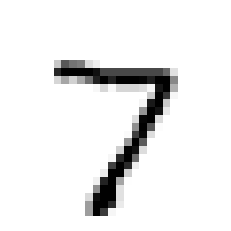

In [42]:
# example of training data
dataF = open('short_mnist_dataset/mnist_test_10.csv', 'r')
dataList = dataF.readlines()
dataF.close()
values = dataList[0].split(',')
print("Value = ", values[0])
img = np.asfarray(values[1:]).reshape((28,28))
plt.axis("off")
plt.imshow(img, cmap = 'Greys', interpolation='None')

In [43]:
# train on short mnist dataset, epochs = 1
nn1 = NeuralNetwork(inN, hidN, outN, lr)
e = 1
nn1.train('short_mnist_dataset/mnist_train_100.csv', e)
nn1.evaluate('short_mnist_dataset/mnist_test_10.csv')

perfomance:  0.7


0.7

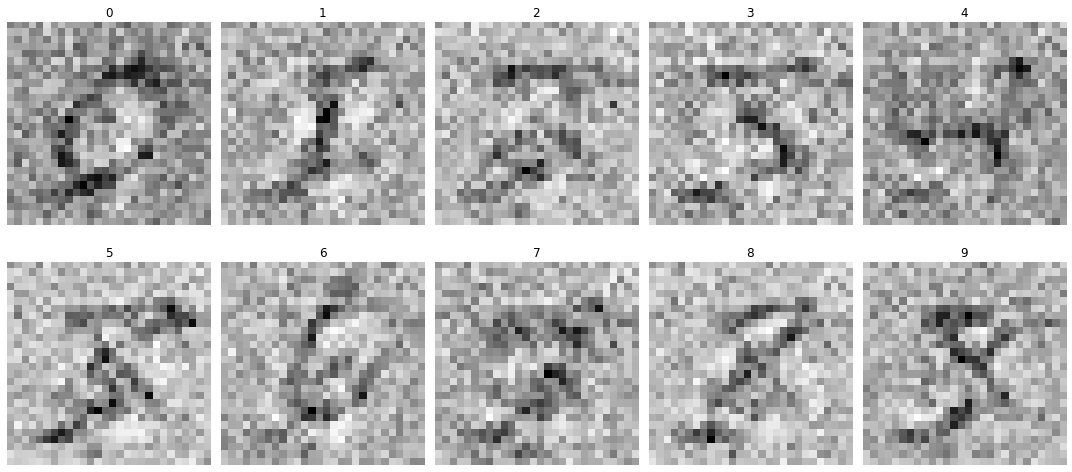

In [44]:
showBackQueries(nn1)

In [45]:
# train on full mnist dataset, epochs = 1
nn2 = NeuralNetwork(inN, hidN, outN, lr)
e = 1
start = time.clock() 
nn2.train('full_mnist_dataset/mnist_train.csv', e)
end = time.clock() 
print("Training time: ", end - start)

Training time:  108.6187878


In [46]:
start = time.clock() 
nn2.evaluate('full_mnist_dataset/mnist_test.csv')
end = time.clock() 
print("Evaluating time: ", end - start)

perfomance:  0.9595
Evaluating time:  2.403150299999993


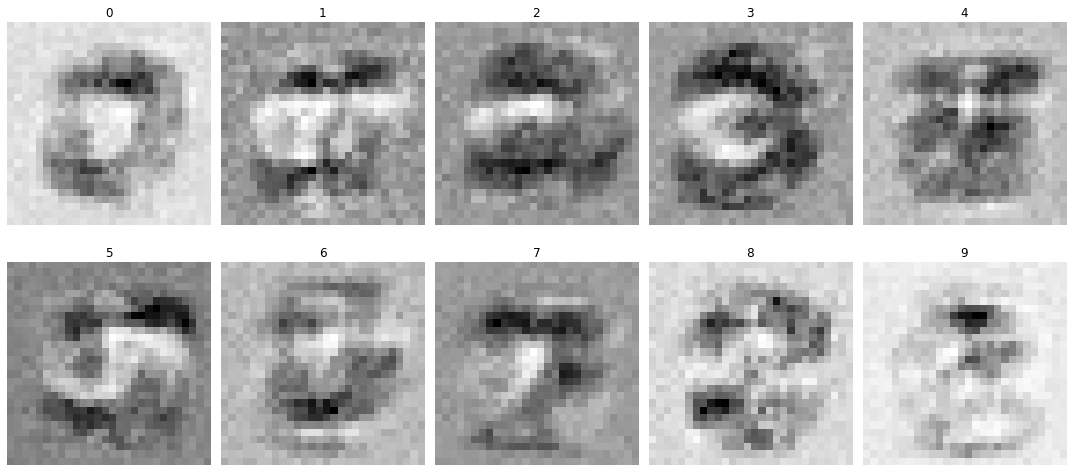

In [47]:
showBackQueries(nn2)

In [48]:
# train on full mnist dataset, epochs = 2
nn3 = NeuralNetwork(inN, hidN, outN, lr)
e = 2
start = time.clock() 
nn3.train('full_mnist_dataset/mnist_train.csv', e)
end = time.clock() 
print("Training time: ", end - start)

Training time:  213.806015


In [49]:
start = time.clock() 
nn3.evaluate('full_mnist_dataset/mnist_test.csv')
end = time.clock() 
print("Evaluating time: ", end - start)

perfomance:  0.9656
Evaluating time:  2.5218028999999547


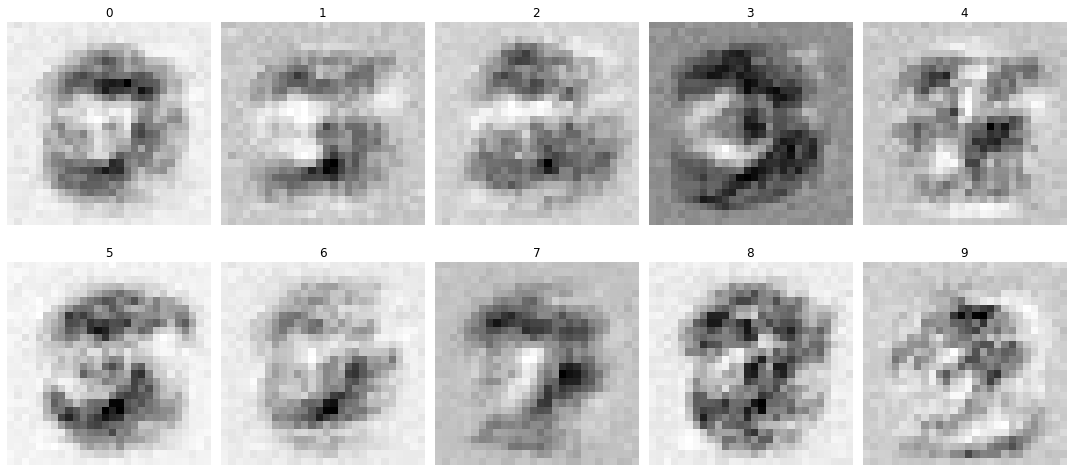

In [50]:
showBackQueries(nn3)

In [55]:
# perfomance and learning rate
lRates = np.arange(0.1, 1, 0.1)
p1 = []
for h in lRates:
    n = NeuralNetwork(inN, hidN, outN, h)
    n.train('full_mnist_dataset/mnist_train.csv', 1)
    p1.append(n.evaluate('full_mnist_dataset/mnist_test.csv'))

perfomance:  0.959
perfomance:  0.9568
perfomance:  0.9516
perfomance:  0.9385
perfomance:  0.9217
perfomance:  0.9171
perfomance:  0.8677
perfomance:  0.8953
perfomance:  0.868


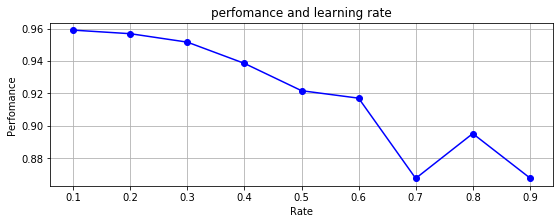

In [56]:
plt.figure(figsize=(9, 3))
plt.plot(lRates, p1, marker='o', color='b')
plt.xlabel('Rate')
plt.ylabel('Perfomance')
plt.title('perfomance and learning rate')
plt.grid()
plt.show()

In [57]:
# perfomance and epochs
epochs = np.arange(1, 10, 1)
p2 = []
for e in epochs:
    n = NeuralNetwork(inN, hidN, outN, 0.2)
    n.train('full_mnist_dataset/mnist_train.csv',e)
    p2.append(n.evaluate('full_mnist_dataset/mnist_test.csv'))

perfomance:  0.9554
perfomance:  0.9644
perfomance:  0.9646
perfomance:  0.9663
perfomance:  0.9669
perfomance:  0.9704
perfomance:  0.9688
perfomance:  0.9686
perfomance:  0.9676


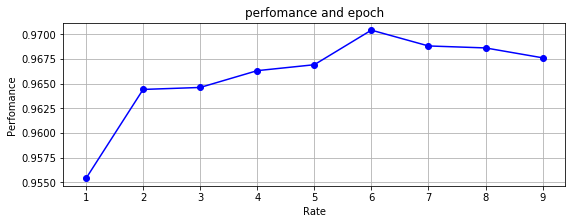

In [58]:
plt.figure(figsize=(9, 3))
plt.plot(epochs, p2, marker='o', color='b')
plt.xlabel('Rate')
plt.ylabel('Perfomance')
plt.title('perfomance and epoch')
plt.grid()
plt.show()

In [59]:
# train on full mnist dataset, with optimal parameters, epochs = 6

# number of nodes in nn
inN =  28*28 # input nodes
hidN = 200 # hidden nodes
outN = 10  # output nodes
lr = 0.2 # learning rate

nn_opt =  NeuralNetwork(inN, hidN, outN, lr)
e = 6
start = time.clock() 
nn_opt.train('full_mnist_dataset/mnist_train.csv', e)
end = time.clock() 
print("Training time: ", end - start)

Training time:  647.4345489999996


In [60]:
start = time.clock() 
print(nn_opt.evaluate('full_mnist_dataset/mnist_test.csv'))
end = time.clock() 
print("Evaluating time: ", end - start)

perfomance:  0.9692
0.9692
Evaluating time:  2.36277599999994


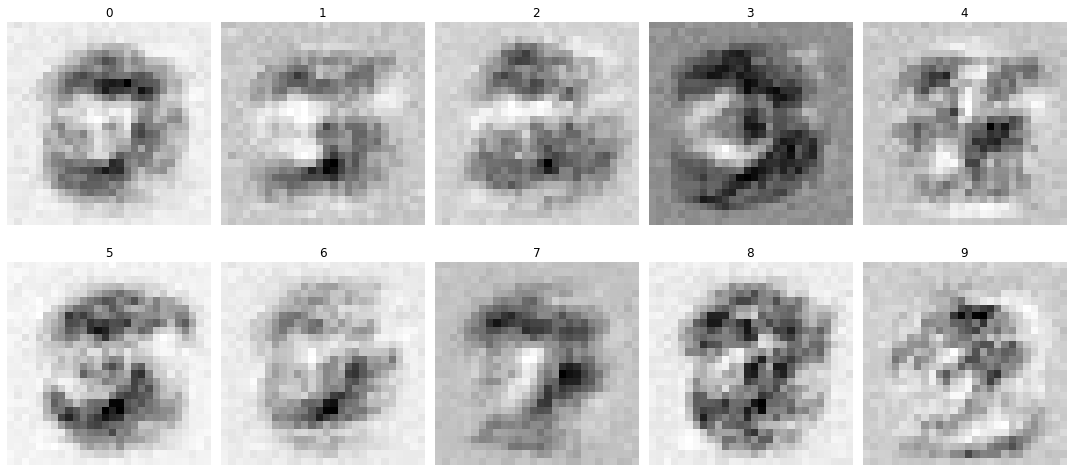

In [61]:
showBackQueries(nn3)